In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#the networks are ought to be fully connected and the input to each layer is a one-dimensional vector.
#the images are 28x28 2D tensors, so i conveted them into 1D vectors. 
#i to converted the images with shape (60000, 28, 28) to have a shape of (60000, 784).



#This way, we avoid 0 values as inputs, which are capable of preventing weight updates.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("images shape : ",x_train.shape)
print("labels shape : ", y_train.shape)

images shape :  (60000, 28, 28)
labels shape :  (60000,)


In [3]:
# flattening
#the pixels range between 0 and 255 including both bounding values.
x_train = x_train.reshape(60000, 28*28).astype('float32')
x_test = x_test.reshape(10000, 28*28).astype('float32')


# normalization
#i mapped these values into an interval from [0.01, 1] by multiplying each pixel by 0.99 / 255 and adding 0.01 to the result as bias. 
fac = 0.99 / 255
train_imgs = np.asfarray(x_train) * fac + 0.01
test_imgs = np.asfarray(x_test) * fac + 0.01
train_labels = np.asfarray(y_train)
test_labels = np.asfarray(y_test)

In [4]:
# one hot encoding samples
# through hours of surfing the internet i found that one hot encoding is a process by which 
# categorical variables are converted to form that could be provided to algorithm to do a better job in prediction.

lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [5]:
# one hot encoding our labels
train_targets = np.array(train_labels).astype(np.int)
train_labels_one_hot = np.eye(np.max(train_targets) + 1)[train_targets]

test_targets = np.array(test_labels).astype(np.int)
test_labels_one_hot = np.eye(np.max(test_targets) + 1)[test_targets]


train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

print(train_labels[0])          # 5.0
print(train_labels_one_hot[0])  # [0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]

5.0
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


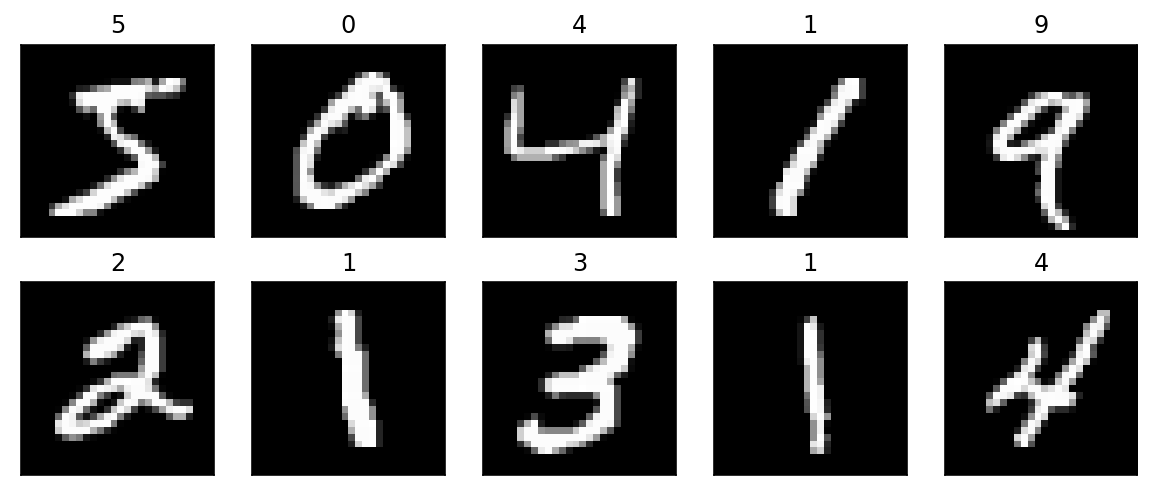

In [6]:
fig = plt.figure(figsize=(10, 4)) #printing some of our data samples from our loaded MNIST datasets

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(train_imgs[idx].reshape(28, 28), cmap='gray')
    ax.set_title(str(y_train[idx]))

In [7]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x)) 


def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True) #solely to calculate probability distribution

# visualizing image and probability prediction
def view_classify(img, ps):
    ps = np.squeeze(ps)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.reshape(28, 28))
    ax1.set_title(ps.argmax())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [8]:
class NeuralNetwork:
    def __init__(self):
        
        self.lr = 0.001
        
        self.w1 = np.random.randn(784, 256) 
        self.b1 = np.zeros((1, 256)) 
        
        self.w2 = np.random.randn(256, 128)
        self.b2 = np.zeros((1, 128)) 
        
        self.w3 = np.random.randn(128, 10)
        self.b3 = np.zeros((1, 10))
        
        
    def feedforward(self):        
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)

        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)

        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)

        
        
    def backprop(self):
        
        output_errors = self.y - self.a3
        
        a3_delta = output_errors * (self.a3 * (1.0 - self.a3))  # w3
        
        z2_delta = np.dot(output_errors, self.w3.T)
        a2_delta = z2_delta * (self.a2 * (1.0 - self.a2)) # w2
        
        z1_delta = np.dot(z2_delta, self.w2.T)
        a1_delta = z1_delta * (self.a1 * (1.0 - self.a1)) # w1
        
        self.w3 += self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 += self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        
        self.w2 += self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 += self.lr * np.sum(a2_delta, axis=0, keepdims=True)
        
        self.w1 += self.lr * np.dot(self.x.T, a1_delta)
        self.b1 += self.lr * np.sum(a1_delta, axis=0, keepdims=True)
    
    
    def train(self, x, y):
        
        '''input_vector and target_vector can 
        be tuple, list or ndarray'''
        
        self.x = np.array(x, ndmin=2)
        self.y = np.array(y, ndmin=2)
        self.feedforward()
        self.backprop()
    
    def predict(self, data):
        self.x = np.array(data, ndmin=2)
        self.feedforward()
        return self.a3
    
    
    def confusion_matrix(self, x, y):
        cm = np.zeros((10, 10), int)
        for i in range(len(x)):
            res = self.predict(x[i])
            res_max = res.argmax()
            target = y[i]
            cm[res_max, int(target)] += 1
        return cm
    
    
    def precision(self, y, confusion_matrix):
        col = confusion_matrix[:, y]
        return confusion_matrix[y, y]/col.sum()
    
    
    def recall(self, y, confusion_matrix):
        row = confusion_matrix[y, :]
        return confusion_matrix[y, y]/row.sum()
    
    
    def evaluate(self, x, y):
        corrects, wrongs = 0, 0
        for i in range(len(x)):
            res = self.predict(x[i])
            res_max = res.argmax()
            if res_max == y[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [9]:
model = NeuralNetwork()

epochs = 1

for epoch in range(epochs):  
    print("epoch: ", epoch+1)
    for i in range(len(train_imgs)):
        model.train(train_imgs[i], train_labels_one_hot[i])
        
    corrects, wrongs = model.evaluate(train_imgs, train_labels)
    print("accruracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = model.evaluate(test_imgs, test_labels)
    print("accruracy test :", corrects / ( corrects + wrongs))
    print("="*50)
    cm = model.confusion_matrix(train_imgs, train_labels)
    for i in range(10):
        print("digit: ", i, "precision :", model.precision(i, cm))
        print("digit: ", i, "recall :", model.recall(i, cm))
        print("="*80)

epoch:  1
accruracy train:  0.8312
accruracy test : 0.8273
digit:  0 precision : 0.8970116495019416
digit:  0 recall : 0.8959527824620573
digit:  1 precision : 0.9513497478493029
digit:  1 recall : 0.8892277831692776
digit:  2 precision : 0.7851628063108426
digit:  2 recall : 0.8798194470566109
digit:  3 precision : 0.7953025607568096
digit:  3 recall : 0.7756920139993637
digit:  4 precision : 0.8322492297158507
digit:  4 recall : 0.8405947441217151
digit:  5 precision : 0.7924737133370227
digit:  5 recall : 0.6968369829683698
digit:  6 precision : 0.895234876647516
digit:  6 recall : 0.8881810561609388
digit:  7 precision : 0.8205905826017558
digit:  7 recall : 0.8912968099861304
digit:  8 precision : 0.7140659716287814
digit:  8 recall : 0.8317738403344614
digit:  9 precision : 0.8095478231635569
digit:  9 recall : 0.7353794472438541
